We first start by importing necessary packages we need for this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Now, we import the data from the link first link into 'train_data', and see what are the columns and columns types of the data. From cell 4-15 are all for Question 1.

In [3]:
train_data = pd.read_csv("http://mozbi-sr-data-science.s3.amazonaws.com/data/moz_customer_data_train.csv", sep='|', index_col=False)
print(train_data.columns)
print(train_data.dtypes)
print(train_data.describe())

Index(['id', 'industry', 'geography', 'most_common_browser',
       'session_time_prior_month_seconds', 'prior_month_paid'],
      dtype='object')
id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
dtype: object
                 id  session_time_prior_month_seconds  prior_month_paid
count  4.800000e+04                      48000.000000      48000.000000
mean   4.997442e+09                       1952.151854         85.624461
std    2.896754e+09                       2579.835645         32.754654
min    3.134830e+05                          1.000000          0.040000
25%    2.481218e+09                        612.000000         63.845328
50%    4.993512e+09                       1210.000000         87.822595
75%    7.516707e+09                       2289.000000        111.080471

Now, we see columns "industry", "geography", and "most_common_browser" are object types. We have to investigate to see what are the unique vaues of these columns. I start with industry column.

In [4]:
print(train_data['industry'].unique())

[nan 'healthcare' 'health care' 'marketing agency' 'Marketing Agency'
 'software' 'unknown' 'unk' 'mktg agency']


As we see, there are inconsistency in the column, for example "marketing agency" has 3 versions, I will make all of them to be "marketing agency", this way the data will be consistent. I also, changed all the NAs and Unknowns to "Uknown" so that we have string type for all the values in column 'unknown'

In [6]:
train_data['industry'].replace('health care', 'healthcare', inplace=True)
train_data['industry'].replace('Marketing Agency', 'marketing agency', inplace=True)
train_data['industry'].replace('mktg agency', 'marketing agency', inplace=True)
train_data['industry'].replace('unk', 'unknown', inplace=True)
train_data['industry'].replace(np.nan, 'unknown', inplace=True)

Now we would like to see how "industry" is among different customers in data.

['unknown' 'healthcare' 'marketing agency' 'software']
(array(['healthcare', 'marketing agency', 'software', 'unknown'],
      dtype=object), array([11963, 18095,  5879, 12063]))


Text(0.5, 1.0, 'Industry categories')

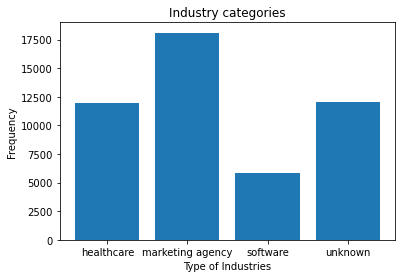

In [7]:
print(train_data['industry'].unique())
industry = train_data['industry']
unique_industries = np.unique(industry, return_counts=True)
print(unique_industries)

plt.figure()
plt.bar(unique_industries[0],unique_industries[1])
plt.xlabel('Type of Industries')
plt.ylabel('Frequency')
plt.title('Industry categories')
# plt.show()

As we see, Marketing Agency is most popular inudstry among customers.
Now, we do the same for "geography" column.

In [8]:
print(train_data['geography'].unique())
train_data['geography'].replace('US', 'United States', inplace=True)
train_data['geography'].replace('USA', 'United States', inplace=True)
train_data['geography'].replace('America', 'United States', inplace=True)
train_data['geography'].replace('CA', 'Canada', inplace=True)
train_data['geography'].replace('GB', 'United Kingdom', inplace=True)
train_data['geography'].replace('UK', 'United Kingdom', inplace=True)
train_data['geography'].replace('England', 'United Kingdom', inplace=True)
train_data['geography'].replace('Esp', 'Spain', inplace=True)
#after cleaning up the column
print(train_data['geography'].unique())

['GB' 'US' 'Canada' 'Greece' 'USA' 'CA' 'America' 'United States' 'Esp'
 'UK' 'India' 'Pakistan' 'United Kingdom' 'England' 'France' 'Spain']
['United Kingdom' 'United States' 'Canada' 'Greece' 'Spain' 'India'
 'Pakistan' 'France']


Now we would like to see what "geograhy" areas are most popular among different customers in the data.

(array(['Canada', 'France', 'Greece', 'India', 'Pakistan', 'Spain',
       'United Kingdom', 'United States'], dtype=object), array([10709,  1739,  1782,  1773,  1797,  3483,  5260, 21457]))


Text(0.5, 1.0, 'Geography Areas')

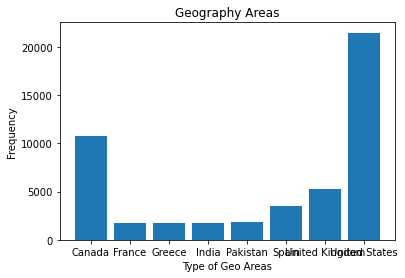

In [9]:
geography = train_data['geography']
unique_geo = np.unique(geography, return_counts=True)
print(unique_geo)

plt.figure()
plt.bar(unique_geo[0],unique_geo[1])
plt.xlabel('Type of Geo Areas')
plt.ylabel('Frequency')
plt.title('Geography Areas')
# plt.show()

As we see, United Staes has the highest number of customers in the data.

Now, we do the same for "most_common_browser" column, and make necessary changes.

['Chrome' 'Firefox' 'IE' 'Safari']
(array(['Chrome', 'Firefox', 'IE', 'Safari'], dtype=object), array([24194,  7921,  7935,  7950]))


Text(0.5, 1.0, 'Web Browsers Categories')

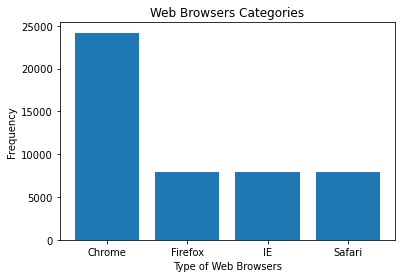

In [10]:
print(train_data['most_common_browser'].unique())
browser = train_data['most_common_browser']
unique_browser = np.unique(browser, return_counts=True)
print(unique_browser)

plt.figure()
plt.bar(unique_browser[0],unique_browser[1])
plt.xlabel('Type of Web Browsers')
plt.ylabel('Frequency')
plt.title('Web Browsers Categories')
# plt.show()

Now we have to convert the categorical columns to dummy variables using "LabelEncoder" function.

In [11]:
train_data['industry'] = LabelEncoder().fit_transform(train_data['industry'])
train_data['geography'] = LabelEncoder().fit_transform(train_data['geography'])
train_data['most_common_browser'] = LabelEncoder().fit_transform(train_data['most_common_browser'])

Now that all of the columns are numerical, we can draw Correlation Matrix and see how differet columns are associated to each oter.

<AxesSubplot:>

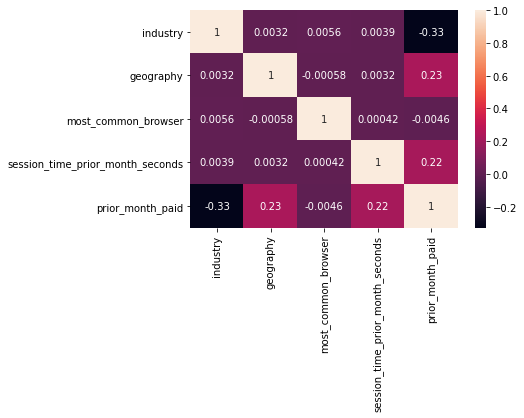

In [12]:
plt.figure()
corr_data = train_data[['industry', 'geography', 'most_common_browser', 'session_time_prior_month_seconds','prior_month_paid']]
sns.heatmap(corr_data.corr(), annot = True)
# plt.show()

As we see from the above correlation Matrix, "Prior_month_paid" has the highest positive correlation with "geography" and "session_time_prior_month_seconds". From here, we start Question 2, first we have to devide the data into target("prior_month_paid") and features(other columns).

In [108]:
target = train_data.prior_month_paid.values
features = train_data.drop(['id', 'prior_month_paid'], axis=1).values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Now, that we divided our dataset into training and test, we use "StandardScalar" to standardize our features to have them all in a standard scale.

In [109]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_val = sc.transform(X_val)
# X_test = sc.transform(X_test)

Now, we run the Linear Regression model on the data.

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature = train_data.drop(['id','prior_month_paid'], axis=1)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
lr_pred = lm.predict(X_test)

Here, we look for inferential interpretation of the above model for Question 3.

In [111]:
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print("Linear Regression R-squared for train: %.2f" %lm.score(X_train, y_train))
print("Linear Regression R-squared for test: %.2f" %lm.score(X_test, y_test))
lr_coeffecients = pd.DataFrame(lm.coef_,feature.columns)
lr_coeffecients.columns = ['Linear Regression Coeffecient']
print(lr_coeffecients)

Linear Regression MAE: 23.913968835018984
Linear Regression MSE: 840.9167982598968
Linear Regression RMSE: 28.998565451758072
Linear Regression R-squared for train: 0.21
Linear Regression R-squared for test: 0.20
                                  Linear Regression Coeffecient
industry                                              -9.866588
geography                                              2.585283
most_common_browser                                    0.068309
session_time_prior_month_seconds                       0.002781


Now, we use the scatterplot to see how the data is distributed.

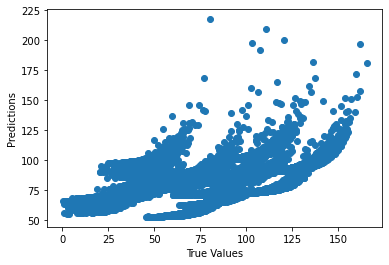

In [112]:
## The line / model
plt.figure()
plt.scatter(y_test, lr_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Now, we look at Linear Regression coefficients to see how diffrent features are affevting the target value.

In [113]:
lr_coeffecients = pd.DataFrame(model.coef_,feature.columns)
lr_coeffecients.columns = ['Linear Regression Coeffecient']
print(lr_coeffecients)

                                  Linear Regression Coeffecient
industry                                              -9.866588
geography                                              2.585283
most_common_browser                                    0.068309
session_time_prior_month_seconds                       0.002781


As we see from the above, industry has negative effect on our target ("prior_month_paid"), and the model is most affected by "geography" and "session_time_prior_month_seconds" which we also noticed in the correlation matrix.

Now, we Start Question 4 with importing the data, and cleaning it same as what we did for the training data file.

In [114]:
test_data = pd.read_csv("http://mozbi-sr-data-science.s3.amazonaws.com/data/moz_customer_data_test.csv", sep='|', index_col=False)
print(test_data.columns)
print(test_data.dtypes)
print(test_data.describe())

Index(['id', 'industry', 'geography', 'most_common_browser',
       'session_time_prior_month_seconds', 'prior_month_paid'],
      dtype='object')
id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
dtype: object
                 id  session_time_prior_month_seconds  prior_month_paid
count  1.200000e+04                      12000.000000      12000.000000
mean   4.976514e+09                       1934.527583         84.983463
std    2.877893e+09                       2523.557970         32.957244
min    5.550730e+05                          1.000000          0.080000
25%    2.486958e+09                        607.000000         62.517315
50%    4.974383e+09                       1097.000000         86.870033
75%    7.441363e+09                       2284.000000        110.642275

We do the same cleaning process as we did for training file. first start with industry column.

In [115]:
print(test_data['industry'].unique())
test_data['industry'].replace('health care', 'healthcare', inplace=True)
test_data['industry'].replace('Marketing Agency', 'marketing agency', inplace=True)
test_data['industry'].replace('mktg agency', 'marketing agency', inplace=True)
test_data['industry'].replace('unk', 'unknown', inplace=True)
test_data['industry'].replace(np.nan, 'unknown', inplace=True)

['health care' 'unk' 'Marketing Agency' nan 'software' 'mktg agency'
 'healthcare' 'unknown' 'marketing agency']


After cleaning, the unique values of the industry column will be:

In [116]:
print(test_data['industry'].unique())
industry_test = train_data['industry']
unique_industries_test = np.unique(industry_test, return_counts=True)
print(unique_industries_test)

['healthcare' 'unknown' 'marketing agency' 'software']
(array([0, 1, 2, 3]), array([11963, 18095,  5879, 12063]))


Now, we clean the Geography column as follows:

In [117]:
print(test_data['geography'].unique())
test_data['geography'].replace('US', 'United States', inplace=True)
test_data['geography'].replace('USA', 'United States', inplace=True)
test_data['geography'].replace('America', 'United States', inplace=True)
test_data['geography'].replace('CA', 'Canada', inplace=True)
test_data['geography'].replace('GB', 'United Kingdom', inplace=True)
test_data['geography'].replace('UK', 'United Kingdom', inplace=True)
test_data['geography'].replace('England', 'United Kingdom', inplace=True)
test_data['geography'].replace('Esp', 'Spain', inplace=True)
print(test_data['geography'].unique())
geography_test = test_data['geography']
unique_geo_test = np.unique(geography_test, return_counts=True)
print(unique_geo_test)

['America' 'England' 'Esp' 'USA' 'Greece' 'CA' 'GB' 'India' 'US'
 'United States' 'France' 'UK' 'Pakistan' 'Canada' 'Spain'
 'United Kingdom']
['United States' 'United Kingdom' 'Spain' 'Greece' 'Canada' 'India'
 'France' 'Pakistan']
(array(['Canada', 'France', 'Greece', 'India', 'Pakistan', 'Spain',
       'United Kingdom', 'United States'], dtype=object), array([2539,  448,  437,  483,  472,  930, 1345, 5346]))


Now, we convert our categorical columns "industry", "geography" and "most_common_browsers" to numerical values.

In [118]:
test_data['industry'] = LabelEncoder().fit_transform(test_data['industry'])
test_data['geography'] = LabelEncoder().fit_transform(test_data['geography'])
test_data['most_common_browser'] = LabelEncoder().fit_transform(test_data['most_common_browser'])

Here, we devide the data into target and feature sets, and then run the above model on the new data.

In [119]:
target_test = test_data.prior_month_paid.values
features_test = test_data.drop(['id', 'prior_month_paid'], axis=1).values
lr_pred_test = model.predict(features_test)

Here are the statistical metrics on new data:

In [120]:
print('Linear Regression MAE:', metrics.mean_absolute_error(target_test, lr_pred_test))
print('Linear Regression MSE:', metrics.mean_squared_error(target_test, lr_pred_test))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(target_test, lr_pred_test)))
print("Linear Regression R-squared for train: %.2f" %model.score(features_test, target_test))

Linear Regression MAE: 24.161783028703542
Linear Regression MSE: 854.8242453004569
Linear Regression RMSE: 29.23737753801556
Linear Regression R-squared for train: 0.21


As we see, the model works similar on the new data, RMSE, MAE, and MSE are all a little bit higher than on the original data, but I would say the model works pretty similar on the new data.

Question 5: I used cross validation to see if I can bring the R2 higher, but it wasn't useful. I believe for next step, I will remove outliers and investigate the data more, to have a better model with higher accuracy. Also, I will try other models such as Lasso and Ridge regression, Decission trees to see how well it will work on the data.  

Question 5: I would recommend that the business focus on the customers from United States who have the most common web browsers which is Chrome, and also the ones who spend more times on the browser in United States.

Question 5: I recommend that the business focus more on the cleaning side of the data, and gather a more diverse set of clients information.

Question 5: As it is clear from the code, I used Standardization on the data too, but R2 and other metrics will change less than 1%, but it will make the coefficients higher, and make the "most_common_browser" coefficient higher than "session_time_prior_month_seconds" which will be consistent with the correlation results, but it won't affect the accuracy of the model.